<a href="https://colab.research.google.com/github/Aggie2024/Classification_Projects/blob/main/Dimentionality_Reduction_Car_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Insurance data

The outcome column indicates 1 if a customer has claimed his/her claim else 0. The data has 19 features from there 18 of them are corresponding logs which were taken by the company.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Setting options
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
# Define custom functions
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [3]:
# Save the filepath as a variable "fpath"
fpath =  "/content/drive/MyDrive/CodingDojo/Project_CarInsurance/Car_Insurance_Claim.csv"
# Read in the file and display the data
df = pd.read_csv(fpath)
# preview of the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   AGE                  object 
 2   GENDER               object 
 3   RACE                 object 
 4   DRIVING_EXPERIENCE   object 
 5   EDUCATION            object 
 6   INCOME               object 
 7   CREDIT_SCORE         float64
 8   VEHICLE_OWNERSHIP    float64
 9   VEHICLE_YEAR         object 
 10  MARRIED              float64
 11  CHILDREN             float64
 12  POSTAL_CODE          int64  
 13  ANNUAL_MILEAGE       float64
 14  VEHICLE_TYPE         object 
 15  SPEEDING_VIOLATIONS  int64  
 16  DUIS                 int64  
 17  PAST_ACCIDENTS       int64  
 18  OUTCOME              float64
dtypes: float64(6), int64(5), object(8)
memory usage: 1.4+ MB


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
# check for missing values
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [5]:
# check for duplicates
# Use a filter to identify duplicated rows
duplicated_rows  = df.duplicated()
# Checking for Duplicates
df.duplicated().sum()

0

In [6]:
# Check for how many unique values are in each column
df.nunique()

ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9018
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

In [7]:
# Inspect numeric data
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [8]:
# Inspect categorical data
object_col = df.select_dtypes('object').columns
for col in object_col:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for AGE
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64


Value Counts for GENDER
GENDER
female    5010
male      4990
Name: count, dtype: int64


Value Counts for RACE
RACE
majority    9012
minority     988
Name: count, dtype: int64


Value Counts for DRIVING_EXPERIENCE
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64


Value Counts for EDUCATION
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64


Value Counts for INCOME
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64


Value Counts for VEHICLE_YEAR
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64


Value Counts for VEHICLE_TYPE
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64




In [9]:
# check correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.00,0.00,0.01,0.01,0.00,0.01,-0.00,0.01,0.01,0.00,-0.01
CREDIT_SCORE,0.00,1.00,0.31,0.28,0.22,0.01,-0.17,0.20,0.13,0.18,-0.33
VEHICLE_OWNERSHIP,0.01,0.31,1.00,0.18,0.13,-0.00,-0.10,0.13,0.09,0.12,-0.38
MARRIED,0.01,0.28,0.18,1.00,0.29,0.01,-0.46,0.22,0.12,0.22,-0.26
CHILDREN,0.00,0.22,0.13,0.29,1.00,0.02,-0.45,0.22,0.12,0.21,-0.23
POSTAL_CODE,0.01,0.01,-0.00,0.01,0.02,1.00,-0.13,0.11,0.04,-0.12,0.10
ANNUAL_MILEAGE,-0.00,-0.17,-0.10,-0.46,-0.45,-0.13,1.00,-0.32,-0.12,-0.20,0.19
SPEEDING_VIOLATIONS,0.01,0.20,0.13,0.22,0.22,0.11,-0.32,1.00,0.36,0.44,-0.29
DUIS,0.01,0.13,0.09,0.12,0.12,0.04,-0.12,0.36,1.00,0.26,-0.19
PAST_ACCIDENTS,0.00,0.18,0.12,0.22,0.21,-0.12,-0.20,0.44,0.26,1.00,-0.31


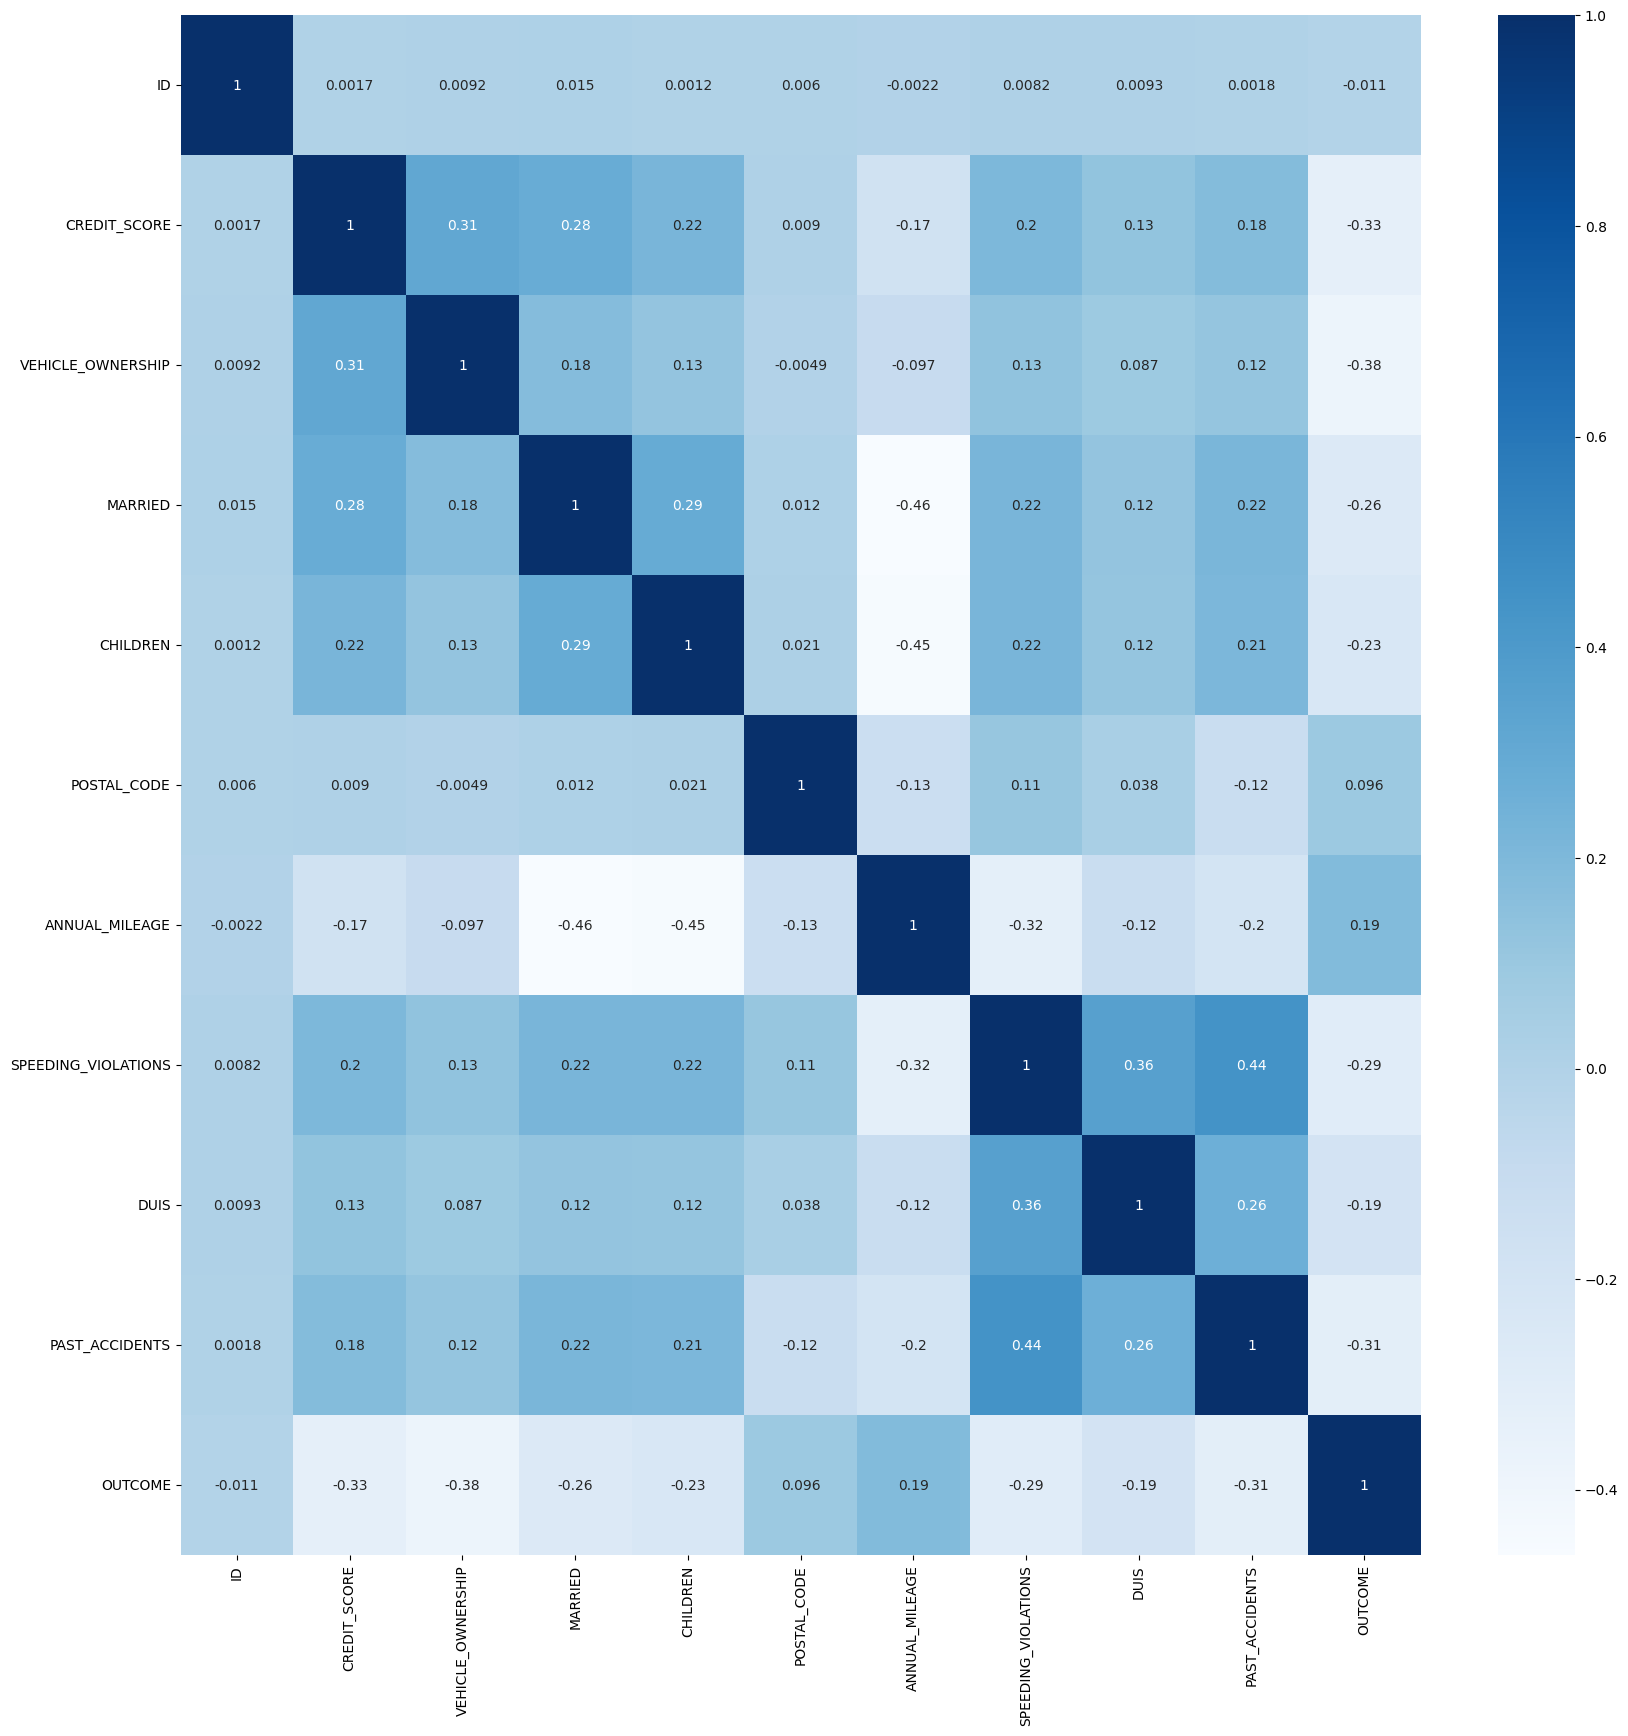

In [10]:
# Make heatmap to visualize correlations
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap = 'Blues', annot = True, ax=ax);

In [11]:
# Make list of columns to drop. In this case just the id column for now
drop_cols = ['id']

# Define target - Outcome
y = df['OUTCOME']
# Define features matrix
X = df.drop(columns = ['OUTCOME'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                     verbose_feature_names_out=False)

Numeric Columns: Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')
OneHotEncoder Columns: Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')


In [13]:
# fit the column transformer on X_train
preprocessor.fit(X_train)
# Transform X_train and X_test
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,GENDER_male,RACE_majority,RACE_minority,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
4901,0.331565,1.367938,0.660062,1.000533,0.674880,3.867776,0.098334,-0.659296,-0.432581,-0.643278,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4375,-1.015047,-1.702804,0.660062,-0.999467,-1.481745,0.694321,0.098334,-0.659296,-0.432581,-0.643278,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6698,-0.632931,0.063118,0.660062,1.000533,0.674880,-0.510486,0.098334,-0.659296,-0.432581,1.147363,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9805,0.198738,-0.477776,0.660062,-0.999467,-1.481745,-0.510486,3.099366,0.229004,-0.432581,-0.643278,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1101,0.185106,-2.802891,0.660062,1.000533,-1.481745,-0.510486,-0.651924,-0.659296,-0.432581,-0.643278,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
# Check the balance of the target
y.value_counts(1)

OUTCOME
0.0    0.6867
1.0    0.3133
Name: proportion, dtype: float64

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_tf, y_train)
y_train_sm.value_counts()

OUTCOME
1.0    5144
0.0    5144
Name: count, dtype: int64

## Modelling

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      5144

    accuracy                           1.00     10288
   macro avg       1.00      1.00      1.00     10288
weighted avg       1.00      1.00      1.00     10288



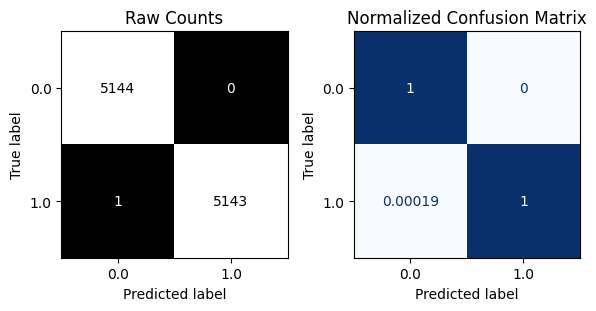


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1723
         1.0       0.75      0.72      0.73       777

    accuracy                           0.84      2500
   macro avg       0.81      0.80      0.81      2500
weighted avg       0.84      0.84      0.84      2500



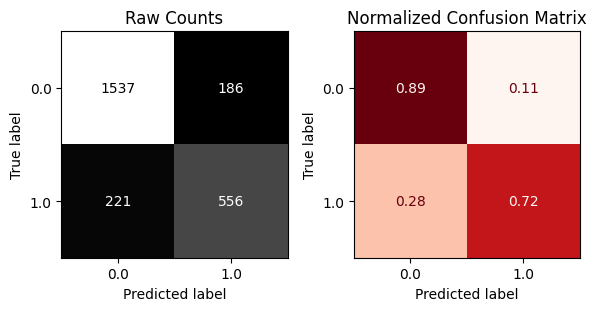

In [16]:
# Use all features for a default random forest
# Instantiate a default random forest with a random state for reproductibility
rf_clf = RandomForestClassifier(random_state=42)

# Fit on the training data
rf_clf.fit(X_train_sm, y_train_sm)

# Evaluate with the custom function
evaluate_classification(rf_clf, X_train_sm,y_train_sm, X_test_tf, y_test)

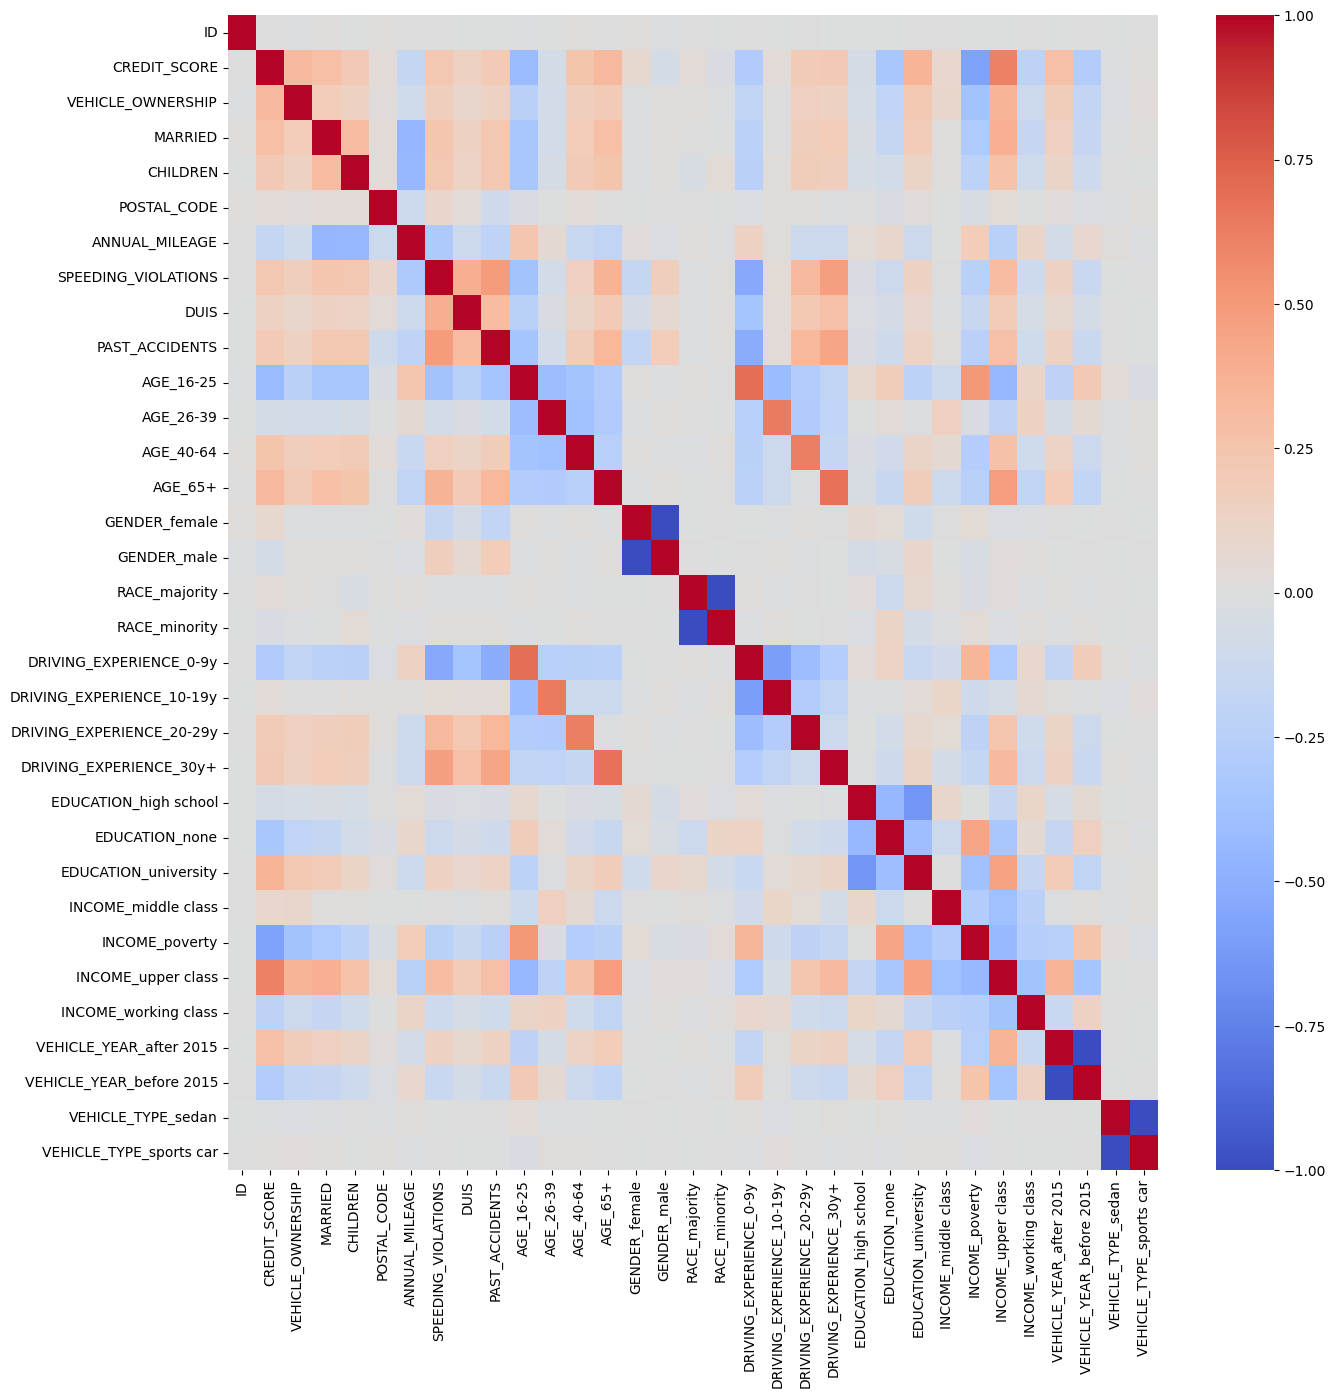

In [17]:
# Make a correlation heatmap of all features
corr = X_train_sm.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm');

## Filter Method - Correlation

In [19]:
!pip install collinearity
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif

  Preparing metadata (setup.py) ... done
  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4443 sha256=26cb6350c81bef63c01dd466433e40eb58542a7825de837203a410e366ff0585
  Stored in directory: /root/.cache/pip/wheels/0e/b1/ea/957b5269b023343361d1f3182a3bd03f8a6fbc86ce713ce7cb
Successfully built collinearity


In [20]:
# Instantiate the selector, indicate theshold for r, also include the appropriate scoring metric for the task
selector = SelectNonCollinear(correlation_threshold = 0.6, scoring = f_classif)

In [21]:
# Fit on the training data, use .values
selector.fit(X_train_sm.values, y_train_sm.values)

In [22]:
# Define a mask for filtering
non_collinear = selector.get_support()
non_collinear[:5]

[True, False, True, True, True]

In [23]:
# Make the T/F a series with the column names as the index
non_collinear_series = pd.Series(selector.get_support(), index=X_train_sm.columns)
non_collinear_series

ID                            True
CREDIT_SCORE                 False
VEHICLE_OWNERSHIP             True
MARRIED                       True
CHILDREN                      True
POSTAL_CODE                   True
ANNUAL_MILEAGE                True
SPEEDING_VIOLATIONS           True
DUIS                          True
PAST_ACCIDENTS                True
AGE_16-25                    False
AGE_26-39                     True
AGE_40-64                    False
AGE_65+                       True
GENDER_female                False
GENDER_male                   True
RACE_majority                 True
RACE_minority                False
DRIVING_EXPERIENCE_0-9y       True
DRIVING_EXPERIENCE_10-19y    False
DRIVING_EXPERIENCE_20-29y     True
DRIVING_EXPERIENCE_30y+      False
EDUCATION_high school        False
EDUCATION_none                True
EDUCATION_university          True
INCOME_middle class           True
INCOME_poverty                True
INCOME_upper class            True
INCOME_working class

In [24]:
# Filter training data
training_data_to_keep = X_train_sm.values[:, non_collinear]
# Filter column names
columns = np.array(X_train_sm.columns)[non_collinear]
# Make traing data into a dataframe
X_train_no_corr = pd.DataFrame(training_data_to_keep, columns = columns)

# Filter testing data
test_data_to_keep =  X_test_tf.values[:, non_collinear]
# Make test data into a dataframe
X_test_no_corr = pd.DataFrame(test_data_to_keep, columns = columns)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      5144

    accuracy                           1.00     10288
   macro avg       1.00      1.00      1.00     10288
weighted avg       1.00      1.00      1.00     10288



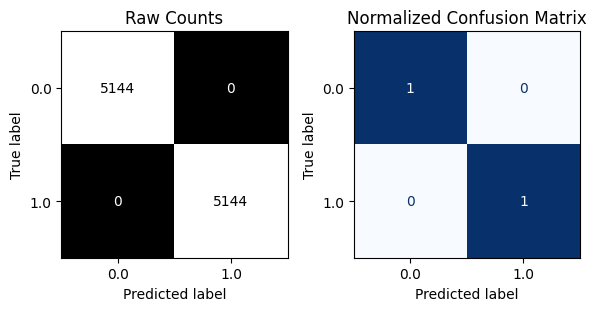


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1723
         1.0       0.76      0.68      0.72       777

    accuracy                           0.83      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.83      0.83      2500



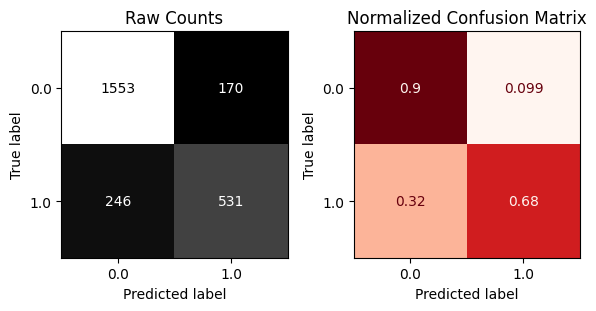

In [26]:
# Test the performance
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_no_corr, y_train_sm)
evaluate_classification(rf_clf, X_train_no_corr, y_train_sm, X_test_no_corr, y_test)

Setting a threshold of 0.6 correlation between features reduced our accuracy to 83% compared to the default random classifier model that had an accuracy of 84%

## Selection of a set number of features using a wrapper

In [27]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt = DecisionTreeClassifier(random_state = 42)

In [28]:
# Instantiate the SequentialFeatureSelector
sfs = SequentialFeatureSelector(dt, n_features_to_select=10,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sfs.fit(X_train_sm,y_train_sm)

SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=10, n_jobs=-1)

In [29]:
# Preview array
sfs.support_[0:5]

array([False, False, False, False, False])

In [30]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sfs.support_
# Only include the features selected
X_train_10 = X_train_sm.loc[:,features_to_keep]
X_test_10 = X_test_tf.loc[:,features_to_keep]
X_train_10.shape

(10288, 10)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      5144
         1.0       0.87      0.86      0.86      5144

    accuracy                           0.86     10288
   macro avg       0.87      0.86      0.86     10288
weighted avg       0.87      0.86      0.86     10288



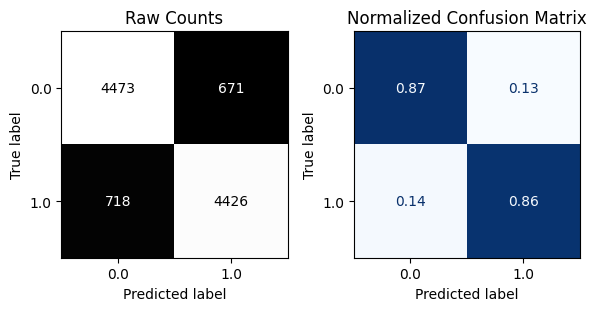


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1723
         1.0       0.72      0.71      0.72       777

    accuracy                           0.82      2500
   macro avg       0.80      0.79      0.79      2500
weighted avg       0.82      0.82      0.82      2500



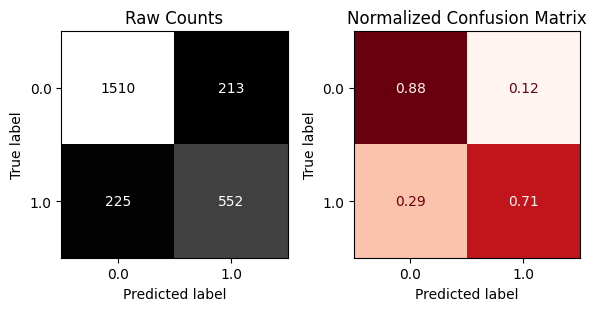

In [31]:
# Instantiate default random forest
rf_clf = RandomForestClassifier(random_state=42)
# Fit on 39 selected featuers
rf_clf.fit(X_train_10, y_train_sm)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_10, y_train_sm, X_test_10, y_test)

As we decreased the number of features, we see that the accuracy reduces further to 82%. The default model performed best in terms of accuracy.